In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
fear_greed_data = pd.read_csv('fear_greed_index.csv')
hist_data = pd.read_csv('historical_data.csv')

Fear and Greed Index Data

In [346]:
fear_greed_data.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [347]:
fear_greed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [348]:
fear_greed_data.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [349]:
fear_greed_data.duplicated().sum()

0

In [350]:
fear_greed_data = fear_greed_data.dropna()

In [351]:
fear_greed_data['timestamp'] = pd.to_datetime(fear_greed_data['timestamp'], unit='s', utc=True)
fear_greed_data['timestamp'] = fear_greed_data['timestamp'].dt.floor('D')

In [355]:
fear_greed_data['timestamp'] = fear_greed_data['timestamp'].dt.strftime('%d-%m-%Y %H:%M:%S')

In [353]:
fear_greed_data.head()

,timestamp,value,classification,date
0,2018-02-01 00:00:00+00:00,30,Fear,2018-02-01
1,2018-02-02 00:00:00+00:00,15,Extreme Fear,2018-02-02
2,2018-02-03 00:00:00+00:00,40,Fear,2018-02-03
3,2018-02-04 00:00:00+00:00,24,Extreme Fear,2018-02-04
4,2018-02-05 00:00:00+00:00,11,Extreme Fear,2018-02-05


In [354]:
fear_greed_data.tail()

,timestamp,value,classification,date
2639,2025-04-28 00:00:00+00:00,54,Neutral,2025-04-28
2640,2025-04-29 00:00:00+00:00,60,Greed,2025-04-29
2641,2025-04-30 00:00:00+00:00,56,Greed,2025-04-30
2642,2025-05-01 00:00:00+00:00,53,Neutral,2025-05-01
2643,2025-05-02 00:00:00+00:00,67,Greed,2025-05-02


Historical Data

In [298]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [299]:
hist_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [300]:
hist_data.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [301]:
hist_data.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [302]:
hist_data.duplicated().sum()

0

In [303]:
hist_data = hist_data.dropna()

In [304]:
hist_data['Timestamp'] = pd.to_datetime(hist_data['Timestamp'], unit='ms', utc=True)
hist_data['Timestamp'] = hist_data['Timestamp'].dt.floor('D')

In [305]:
hist_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 00:00:00+00:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 00:00:00+00:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 00:00:00+00:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 00:00:00+00:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 00:00:00+00:00


In [306]:
hist_data['Timestamp'] = hist_data['Timestamp'].dt.strftime('%d-%m-%Y %H:%M:%S')


In [307]:
hist_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,27-10-2024 00:00:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,27-10-2024 00:00:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,27-10-2024 00:00:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,27-10-2024 00:00:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,27-10-2024 00:00:00


In [308]:
hist_data.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,15-06-2025 00:00:00
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,15-06-2025 00:00:00
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,15-06-2025 00:00:00
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,15-06-2025 00:00:00
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,15-06-2025 00:00:00


In [309]:
hist_data['Account_id'] = hist_data.groupby('Account').ngroup()

In [310]:
hist_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Account_id
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,27-10-2024 00:00:00,25
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,27-10-2024 00:00:00,25
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,27-10-2024 00:00:00,25
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,27-10-2024 00:00:00,25
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,27-10-2024 00:00:00,25


In [311]:
hist_data.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Account_id
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,15-06-2025 00:00:00,15
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,15-06-2025 00:00:00,15
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,15-06-2025 00:00:00,15
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,15-06-2025 00:00:00,15
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,15-06-2025 00:00:00,15


Key metrics to be followed-

1. Daily PnL per Account

In [312]:
hist_data.groupby(['Account_id', 'Timestamp'])['Closed PnL'].sum()

Account_id  Timestamp          
0           19-02-2025 00:00:00    1.927736e+06
            27-10-2024 00:00:00   -3.275059e+05
1           15-06-2025 00:00:00    1.017915e+04
            19-02-2025 00:00:00    1.709873e+04
            27-10-2024 00:00:00    2.060745e+04
                                       ...     
30          19-02-2025 00:00:00    3.254420e+05
            27-10-2024 00:00:00    1.167168e+04
31          15-06-2025 00:00:00    2.489757e+04
            19-02-2025 00:00:00    1.269680e+05
            27-10-2024 00:00:00    6.842150e+05
Name: Closed PnL, Length: 102, dtype: float64

4. Number of Trades per Day

In [313]:
hist_data.groupby('Timestamp').size()

Timestamp
03-07-2024 00:00:00      7141
09-03-2024 00:00:00      6962
14-11-2023 00:00:00      1045
15-06-2025 00:00:00     26961
19-02-2025 00:00:00    133871
27-10-2024 00:00:00     35241
28-03-2023 00:00:00         3
dtype: int64

2. Win rate followed by Average Trade size

In [314]:
daily_win_rate = (
    hist_data
    .assign(win = hist_data['Closed PnL'] > 0)
    .groupby(['Account_id', 'Timestamp'])['win'].mean()
)
daily_win_rate

Account_id  Timestamp          
0           19-02-2025 00:00:00    0.405542
            27-10-2024 00:00:00    0.025974
1           15-06-2025 00:00:00    0.442369
            19-02-2025 00:00:00    0.435041
            27-10-2024 00:00:00    0.531250
                                     ...   
30          19-02-2025 00:00:00    0.372230
            27-10-2024 00:00:00    0.153558
31          15-06-2025 00:00:00    0.363014
            19-02-2025 00:00:00    0.384864
            27-10-2024 00:00:00    0.569260
Name: win, Length: 102, dtype: float64

In [315]:
hist_data.groupby(['Account_id', 'Timestamp'])['Size USD'].mean()

Account_id  Timestamp          
0           19-02-2025 00:00:00    16345.241940
            27-10-2024 00:00:00    14810.891818
1           15-06-2025 00:00:00     1533.468395
            19-02-2025 00:00:00     1693.351684
            27-10-2024 00:00:00     2492.749906
                                       ...     
30          19-02-2025 00:00:00     8103.972913
            27-10-2024 00:00:00     2725.780599
31          15-06-2025 00:00:00     1658.114214
            19-02-2025 00:00:00     1554.837334
            27-10-2024 00:00:00     2693.283796
Name: Size USD, Length: 102, dtype: float64

5. Long/Short Ratio

In [316]:
hist_data.groupby(['Timestamp', 'Direction']).size().unstack(fill_value=0).assign(long_short_ratio=lambda x: x['Buy'] / x['Sell'])



Direction,Auto-Deleveraging,Buy,Close Long,Close Short,Liquidated Isolated Short,Long > Short,Open Long,Open Short,Sell,Settlement,Short > Long,Spot Dust Conversion,long_short_ratio
Timestamp,,,,,,,,,,,,,
03-07-2024 00:00:00,8,786,886,1799,0,0,918,2389,295,0,2,58,2.664407
09-03-2024 00:00:00,0,88,2389,1931,0,13,1339,1114,75,0,13,0,1.173333
14-11-2023 00:00:00,0,0,380,103,0,0,388,174,0,0,0,0,NaN
15-06-2025 00:00:00,0,2059,3743,7922,1,3,4331,6880,2012,0,5,5,1.023360
19-02-2025 00:00:00,0,7977,36555,20232,0,36,37828,23472,7687,1,43,40,1.037726
27-10-2024 00:00:00,0,5806,4725,4026,0,5,5088,5712,9833,0,7,39,0.590461
28-03-2023 00:00:00,0,0,0,0,0,0,3,0,0,0,0,0,NaN


3. Leverage Distribution

In [317]:
hist_data['leverage'] = hist_data['Size USD'] / hist_data['Start Position']

hist_data = hist_data.replace([np.inf, -np.inf], np.nan)
hist_data = hist_data.dropna(subset=['leverage'])

In [318]:
leverage_distribution = (
    hist_data
    .assign(leverage_bucket=pd.cut(
        hist_data['leverage'],
        bins=[0, 1, 2, 5, 10, 20, np.inf],
        labels=['<1x', '1-2x', '2–5x', '5–10x', '10–20x', '20x+']
    ))
    .groupby('leverage_bucket')
    .size()
    .reset_index(name='num_trades')
)

/var/folders/kn/k8w5yjls0kxdc3_svrv6wy600000gn/T/ipykernel_24543/2042730905.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('leverage_bucket')


In [319]:
leverage_by_account = (
    hist_data
    .groupby('Account_id')['leverage']
    .agg(
        avg_leverage='mean',
        median_leverage='median',
        max_leverage='max'
    )
    .reset_index()
)

Showing Leverage column at the end of the table

In [320]:
hist_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Account_id,leverage
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,27-10-2024 00:00:00,25,0.129424
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,27-10-2024 00:00:00,25,1.147739
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,27-10-2024 00:00:00,25,0.996059
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,27-10-2024 00:00:00,25,0.054091
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,27-10-2024 00:00:00,25,0.008681


Merging both datasets together to analyse further!

In [357]:
fear_greed_data.tail()

,timestamp,value,classification,date
2639,28-04-2025 00:00:00,54,Neutral,2025-04-28
2640,29-04-2025 00:00:00,60,Greed,2025-04-29
2641,30-04-2025 00:00:00,56,Greed,2025-04-30
2642,01-05-2025 00:00:00,53,Neutral,2025-05-01
2643,02-05-2025 00:00:00,67,Greed,2025-05-02


In [ ]:
Merged_data = pd.merge(hist_data, fear_greed_data, left_on='Timestamp', right_on='Timestamp', how='left')

In [ ]:
Merged_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,Account_id,leverage,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,27-10-2024 00:00:00,25,0.129424,27-10-2024 00:00:00,74.0,Greed,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,27-10-2024 00:00:00,25,1.147739,27-10-2024 00:00:00,74.0,Greed,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,27-10-2024 00:00:00,25,0.996059,27-10-2024 00:00:00,74.0,Greed,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,27-10-2024 00:00:00,25,0.054091,27-10-2024 00:00:00,74.0,Greed,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,1298.215466,Buy,0.0,...,True,0.000493,7.330000e+14,27-10-2024 00:00:00,25,0.008681,27-10-2024 00:00:00,74.0,Greed,2024-10-27


In [356]:
Merged_data.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,Account_id,leverage,timestamp,value,classification,date
207134,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,...,False,0.042080,1.990000e+14,15-06-2025 00:00:00,15,0.055760,NaN,NaN,NaN,NaN
207135,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,...,False,0.233863,9.260000e+14,15-06-2025 00:00:00,15,0.326424,NaN,NaN,NaN,NaN
207136,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,...,False,0.046616,6.930000e+14,15-06-2025 00:00:00,15,0.092487,NaN,NaN,NaN,NaN
207137,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,...,False,0.396337,4.180000e+14,15-06-2025 00:00:00,15,0.858450,NaN,NaN,NaN,NaN
207138,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,...,False,0.111982,3.270000e+14,15-06-2025 00:00:00,15,1.101003,NaN,NaN,NaN,NaN


In [359]:
Merged_data.isnull().sum()

Account                 0
Coin                    0
Execution Price         0
Size Tokens             0
Size USD                0
Side                    0
Timestamp IST           0
Start Position          0
Direction               0
Closed PnL              0
Transaction Hash        0
Order ID                0
Crossed                 0
Fee                     0
Trade ID                0
Timestamp               0
Account_id              0
leverage                0
timestamp           26719
value               26719
classification      26719
date                26719
dtype: int64

In [360]:
Merged_data.dropna(inplace=True)

In [362]:
Merged_data.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,Account_id,leverage,timestamp,value,classification,date
206682,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,4.13,551.77,BUY,18-04-2025 20:03,-1797.88,Close Short,-82.883731,...,False,0.055176,6.900000e+14,19-02-2025 00:00:00,15,-0.306900,19-02-2025 00:00:00,44.0,Fear,2025-02-19
206683,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,7.50,1002.00,BUY,18-04-2025 20:03,-1793.75,Close Short,-150.515250,...,False,0.100200,6.610000e+13,19-02-2025 00:00:00,15,-0.558606,19-02-2025 00:00:00,44.0,Fear,2025-02-19
206684,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,3.93,525.05,BUY,18-04-2025 20:03,-1786.25,Close Short,-78.869991,...,False,0.052504,1.010000e+15,19-02-2025 00:00:00,15,-0.293940,19-02-2025 00:00:00,44.0,Fear,2025-02-19
206685,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,4.34,579.82,BUY,18-04-2025 20:03,-1782.32,Close Short,-87.098158,...,False,0.057982,2.700000e+13,19-02-2025 00:00:00,15,-0.325318,19-02-2025 00:00:00,44.0,Fear,2025-02-19
206686,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,1777.98,237538.13,BUY,18-04-2025 20:03,-1777.98,Close Short,-35681.747230,...,False,23.753812,4.030000e+14,19-02-2025 00:00:00,15,-133.600001,19-02-2025 00:00:00,44.0,Fear,2025-02-19


Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?

In [365]:
daily_perf = (
    Merged_data
    .groupby(['Account_id', 'Timestamp', 'classification'])
    .agg(
        daily_pnl=('Closed PnL', 'sum'),
        win_rate=('Closed PnL', lambda x: (x > 0).mean())
    )
    .reset_index()
)

In [366]:
perf_by_sentiment = (
    daily_perf
    .groupby('classification')
    .agg(
        avg_daily_pnl=('daily_pnl', 'mean'),
        median_daily_pnl=('daily_pnl', 'median'),
        pnl_volatility=('daily_pnl', 'std'),   # drawdown proxy
        avg_win_rate=('win_rate', 'mean')
    )
    .reset_index()
)

In [372]:
daily_perf.head()

,Account_id,Timestamp,classification,daily_pnl,win_rate
0,0,19-02-2025 00:00:00,Fear,1.927736e+06,0.406511
1,0,27-10-2024 00:00:00,Greed,-3.275059e+05,0.026144
2,1,19-02-2025 00:00:00,Fear,1.709873e+04,0.436648
3,1,27-10-2024 00:00:00,Greed,2.060745e+04,0.539683
4,2,03-07-2024 00:00:00,Neutral,-1.000000e+00,0.000000


In [368]:
perf_by_sentiment.head()

,classification,avg_daily_pnl,median_daily_pnl,pnl_volatility,avg_win_rate
0,Extreme Greed,35393.098355,0.000000,85325.499902,0.359622
1,Fear,209372.662205,81389.682515,380423.906864,0.425017
2,Greed,99675.516731,35988.376437,282694.285526,0.392621
3,Neutral,19842.797260,-0.418640,57227.787895,0.285842


The Average Win rate is can be concluded from top to bottom-
Fear
Greed
Extreme Greed
Neutral


Showcasing that the traders tend loose most amount of amount in greedy sentiment or Bull markets and Neutral markets, whereas grab the most in Bear markets or when markets are in correction mode.



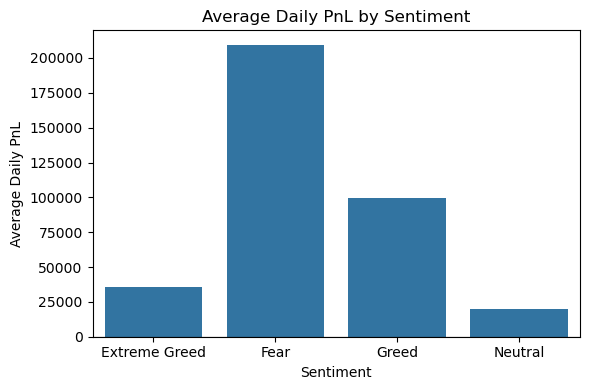

In [377]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=perf_by_sentiment,
    x='classification',
    y='avg_daily_pnl',
    errorbar=None
)

plt.axhline(0, color='black', linewidth=0.8)
plt.title('Average Daily PnL by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Daily PnL')
plt.tight_layout()
plt.show()

Profits significantly drop in Neutral and Extreme greed, while increases the most in Fear.

Trade Frequency

In [379]:
trade_freq = (
    Merged_data
    .groupby(['Timestamp', 'classification'])
    .size()
    .reset_index(name='num_trades')
)

trade_freq_by_sentiment = (
    trade_freq
    .groupby('classification')['num_trades']
    .mean()
    .reset_index()
)

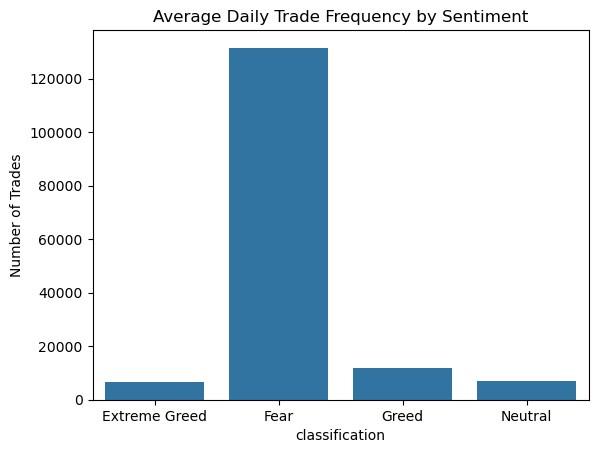

In [380]:
sns.barplot(
    data=trade_freq_by_sentiment,
    x='classification',
    y='num_trades',
    errorbar=None
)
plt.title('Average Daily Trade Frequency by Sentiment')
plt.ylabel('Number of Trades')
plt.show()

Fear reflects the highest Avg Daily Trade Frequency by Sentiment

Calculating Leverage Usage

In [381]:
leverage_by_sentiment = (
    Merged_data
    .groupby('classification')['leverage']
    .mean()
    .reset_index()
)

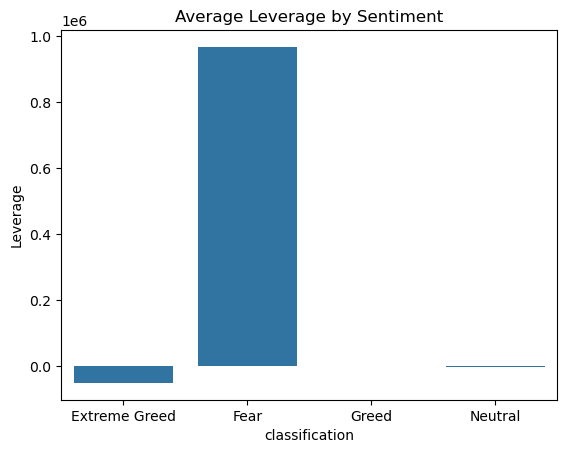

In [382]:
sns.barplot(
    data=leverage_by_sentiment,
    x='classification',
    y='leverage',
    errorbar=None
)
plt.title('Average Leverage by Sentiment')
plt.ylabel('Leverage')
plt.show()

Conclusion: Traders take their largest leverage risks during Fear periods, not during Greed, suggesting stress-driven or opportunistic risk-taking rather than confidence-driven behaviour.

Long / Short bias

In [383]:
long_short = (
    Merged_data
    .groupby(['classification', 'Direction'])
    .size()
    .unstack(fill_value=0)
    .assign(long_short_ratio=lambda x: x['Buy'] / x['Sell'])
    .reset_index()
)

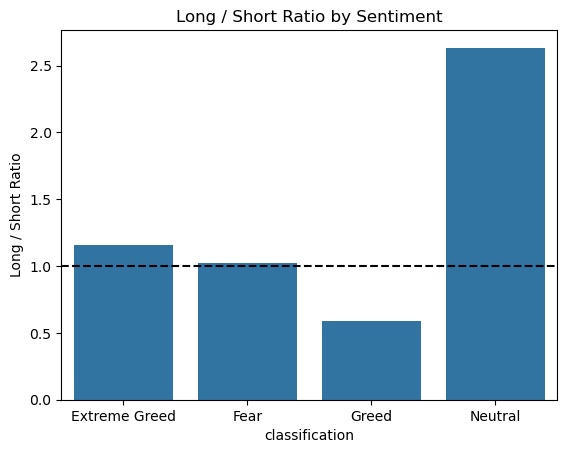

In [384]:
sns.barplot(
    data=long_short,
    x='classification',
    y='long_short_ratio',
    errorbar=None
)
plt.axhline(1, color='black', linestyle='--')
plt.title('Long / Short Ratio by Sentiment')
plt.ylabel('Long / Short Ratio')
plt.show()

Conculusion: Traders do not simply go long when sentiment is positive or short when it is negative; instead, they are most bullish during neutral periods and tend to reduce or reverse long exposure during Greed, showing more cautious or contrarian behaviour

Position Size

In [385]:
size_by_sentiment = (
    Merged_data
    .groupby('classification')['Size USD']
    .mean()
    .reset_index()
)

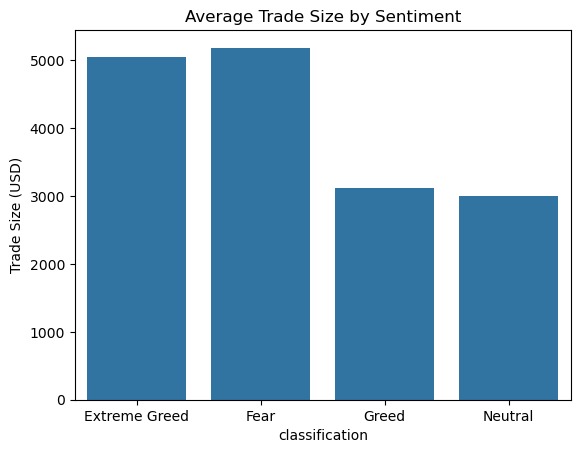

In [386]:
sns.barplot(
    data=size_by_sentiment,
    x='classification',
    y='Size USD',
    errorbar=None
)
plt.title('Average Trade Size by Sentiment')
plt.ylabel('Trade Size (USD)')
plt.show()

Conculusion: Traders take larger positions when market sentiment is at extremes, especially during Fear, while trade sizes are smaller in calmer or moderately positive conditions.

High Vs Low Leverage Traders

In [389]:
leverage_by_account = (
    Merged_data
    .groupby('Account_id')['leverage']
    .mean()
    .reset_index()
)

In [390]:
leverage_by_account['leverage_segment'] = pd.qcut(
    leverage_by_account['leverage'],
    q=2,
    labels=['Low Leverage', 'High Leverage']
)

In [391]:
daily_perf_seg = daily_perf.merge(
    leverage_by_account[['Account_id', 'leverage_segment']],
    on='Account_id',
    how='left'
)

In [392]:
leverage_perf = (
    daily_perf_seg
    .groupby(['leverage_segment', 'classification'])
    .agg(
        avg_pnl=('daily_pnl', 'mean'),
        win_rate=('win_rate', 'mean'),
        pnl_volatility=('daily_pnl', 'std')
    )
    .reset_index()
)

/var/folders/kn/k8w5yjls0kxdc3_svrv6wy600000gn/T/ipykernel_24543/80044593.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['leverage_segment', 'classification'])


Average Daily PnL by Leverage Segment & Sentiment

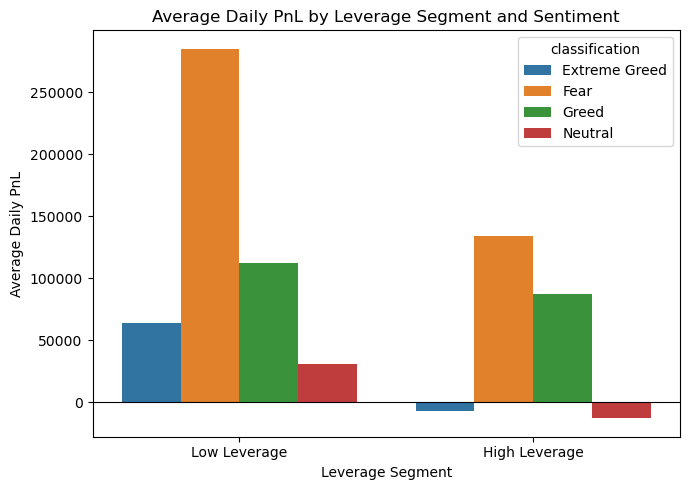

In [398]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=leverage_perf,
    x='leverage_segment',
    y='avg_pnl',
    hue='classification',
    errorbar=None
)

plt.axhline(0, color='black', linewidth=0.8)
plt.title('Average Daily PnL by Leverage Segment and Sentiment')
plt.ylabel('Average Daily PnL')
plt.xlabel('Leverage Segment')
plt.tight_layout()
plt.show()

Conclusion: Low-leverage traders deliver more stable and higher profits across all market sentiments, while high-leverage traders underperform and are more vulnerable to losses

PnL volatility (drawdown proxy) by leverage segment

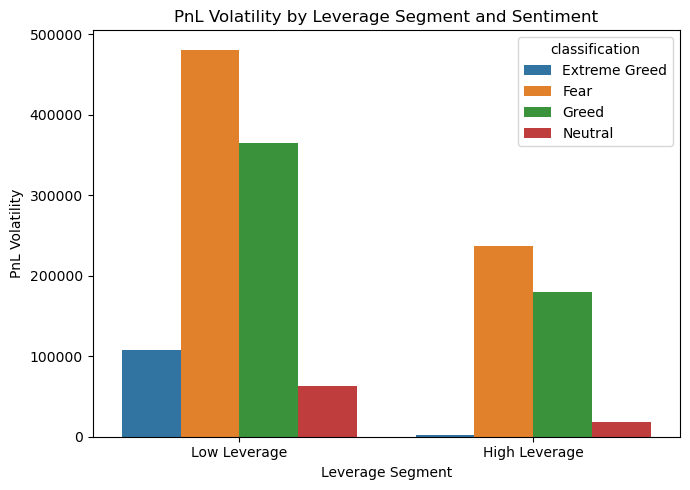

In [399]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=leverage_perf,
    x='leverage_segment',
    y='pnl_volatility',
    hue='classification',
    errorbar=None
)

plt.title('PnL Volatility by Leverage Segment and Sentiment')
plt.ylabel('PnL Volatility')
plt.xlabel('Leverage Segment')
plt.tight_layout()
plt.show()

Conclusion: Low-leverage traders earn higher profits but experience larger day-to-day swings, while high-leverage traders show lower volatility mainly because they participate less and underperform overall.

Frequent vs Infrequent Traders

In [394]:
trade_freq_by_account = (
    Merged_data
    .groupby('Account_id')
    .size()
    .reset_index(name='num_trades')
)


In [395]:
trade_freq_by_account['freq_segment'] = pd.qcut(
    trade_freq_by_account['num_trades'],
    q=2,
    labels=['Infrequent', 'Frequent']
)

In [396]:
daily_perf_seg = daily_perf_seg.merge(
    trade_freq_by_account[['Account_id', 'freq_segment']],
    on='Account_id',
    how='left'
)

In [397]:
freq_perf = (
    daily_perf_seg
    .groupby(['freq_segment', 'classification'])
    .agg(
        avg_pnl=('daily_pnl', 'mean'),
        win_rate=('win_rate', 'mean')
    )
    .reset_index()
)

/var/folders/kn/k8w5yjls0kxdc3_svrv6wy600000gn/T/ipykernel_24543/153857594.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['freq_segment', 'classification'])


Visualisation: 

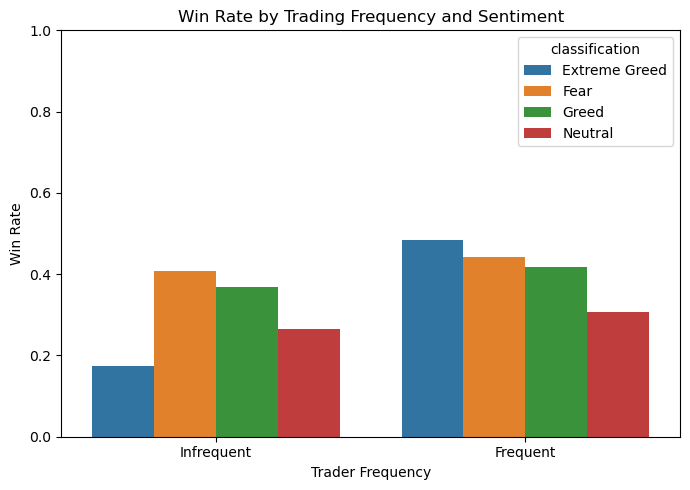

In [400]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=freq_perf,
    x='freq_segment',
    y='win_rate',
    hue='classification',
    errorbar=None
)

plt.ylim(0, 1)
plt.title('Win Rate by Trading Frequency and Sentiment')
plt.ylabel('Win Rate')
plt.xlabel('Trader Frequency')
plt.tight_layout()
plt.show()

Conclusion: Frequent traders consistently achieve higher win rates than infrequent traders across all sentiment regimes, suggesting that active participation improves trade execution and adaptability.

Consistent vs Inconsistent traders

In [402]:
consistency_by_account = (
    daily_perf
    .groupby('Account_id')['daily_pnl']
    .std()
    .reset_index(name='pnl_volatility')
)

In [403]:
consistency_by_account['consistency_segment'] = pd.qcut(
    consistency_by_account['pnl_volatility'],
    q=2,
    labels=['Consistent', 'Inconsistent']
)

In [404]:
daily_perf_seg = daily_perf_seg.merge(
    consistency_by_account[['Account_id', 'consistency_segment']],
    on='Account_id',
    how='left'
)

In [405]:
consistency_perf = (
    daily_perf_seg
    .groupby(['consistency_segment', 'classification'])
    .agg(
        avg_pnl=('daily_pnl', 'mean'),
        win_rate=('win_rate', 'mean')
    )
    .reset_index()
)

/var/folders/kn/k8w5yjls0kxdc3_svrv6wy600000gn/T/ipykernel_24543/314481246.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['consistency_segment', 'classification'])


Visualisation: Consistent vs Inconsistent Traders

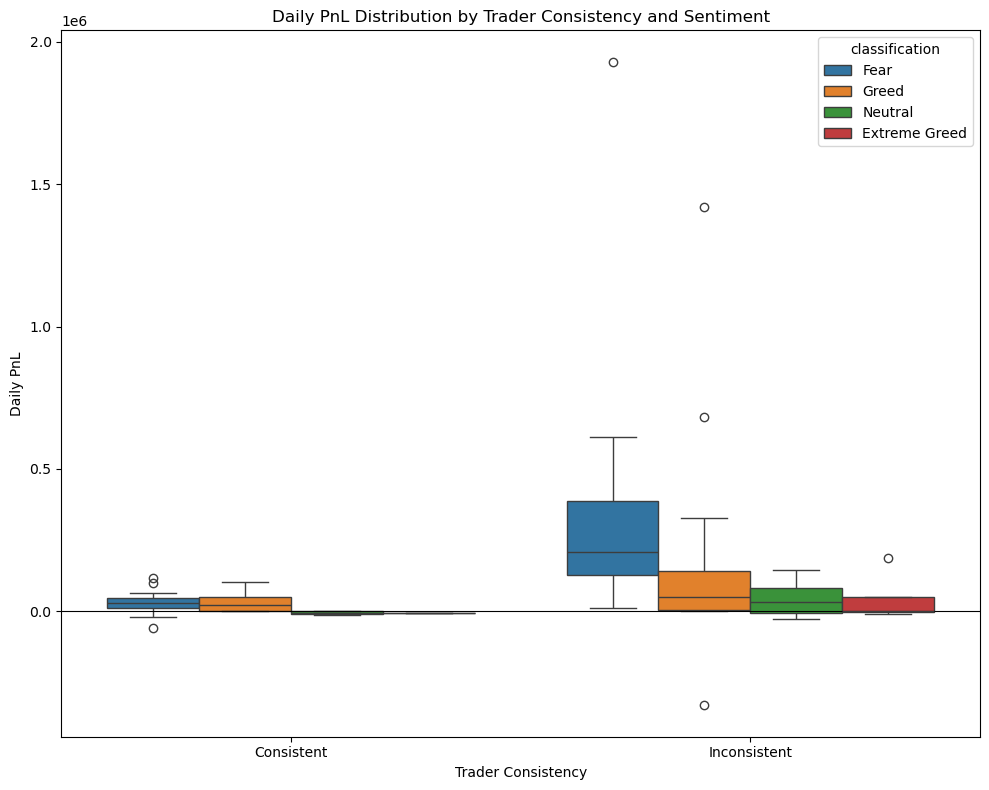

In [407]:
plt.figure(figsize=(10, 8))
sns.boxplot(
    data=daily_perf_seg,
    x='consistency_segment',
    y='daily_pnl',
    hue='classification'
)

plt.axhline(0, color='black', linewidth=0.8)
plt.title('Daily PnL Distribution by Trader Consistency and Sentiment')
plt.ylabel('Daily PnL')
plt.xlabel('Trader Consistency')
plt.tight_layout()
plt.show()

Conclusion: Consistent traders show stable and controlled performance across all market sentiments, while inconsistent traders experience much larger gains and losses, especially during Fear and Greed periods.

Below are two rules of thumb based on the data analysis for the bitcoin trading sentiment-

*First, during Fear regimes, leverage and position sizes should be reduced for high-leverage and inconsistent traders, as elevated volatility leads to larger drawdowns without improved performance. 

*Second, during Greed regimes, increased trading activity should be concentrated among historically frequent and consistent traders, while less consistent participants should limit exposure to avoid sentiment-driven losses.